# Test Models

This notebook tests deep learning models for enhanced JPEG reconstruction.

In [1]:
%matplotlib inline
from __future__ import print_function, division
import matplotlib.pylab as plt
import numpy as np
from keras.optimizers import Adam
import os
import glob
import io
from PIL import Image
import sys

# Importing our U-Net model
MY_UTILS_PATH = "../Modules/"
if not MY_UTILS_PATH in sys.path:
    sys.path.append(MY_UTILS_PATH)
from models import unet_old, unet, my_unet

/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/matplotlib/font_manager.py:278: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '
Using TensorFlow backend.


In [2]:
# Train and validation data paths
test_path = "/home/ubuntu/volume1/TIFF/Testing/*.tif"

# Listing train and validation images
test_images = glob.glob(test_path)

# Summary of images
print("Test set size:", len(test_images))

Test set size: 16110


In [3]:
H,W = 256, 256
norm = 255.0
compr_range = (10,20)

test_unc = np.zeros((len(test_images),H,W,1), dtype=np.float32)
test_compr = test_unc.copy()
compr_test = np.random.choice(np.arange(compr_range[0],compr_range[1], dtype=int), \
                               len(test_images),replace = True)

# Test set
for ii in range(len(test_images)):
    # Load uncompressed image
    im1 = Image.open(test_images[ii])
    test_unc[ii,:,:,0] = np.array(im1)

    # JPEG compress the image    
    buf = io.BytesIO()
    im1.save(buf, "JPEG", quality=int(compr_test[ii]))
    im2 = Image.open(buf)
    test_compr[ii,:,:,0] = np.array(im2)

test_unc /= norm
test_compr /= norm

In [4]:
opt=Adam(lr=0.0001)
model_name = "../Models/residual_unet_data_augmentation_compress_10_20.hdf5"
#model = unet_old(input_size = (256 ,256 ,1),drop = 0.0,residual = True)
model=my_unet()
model.compile(loss = "mse",optimizer=opt)

model.load_weights(model_name)

In [5]:
pred = model.predict(test_compr)

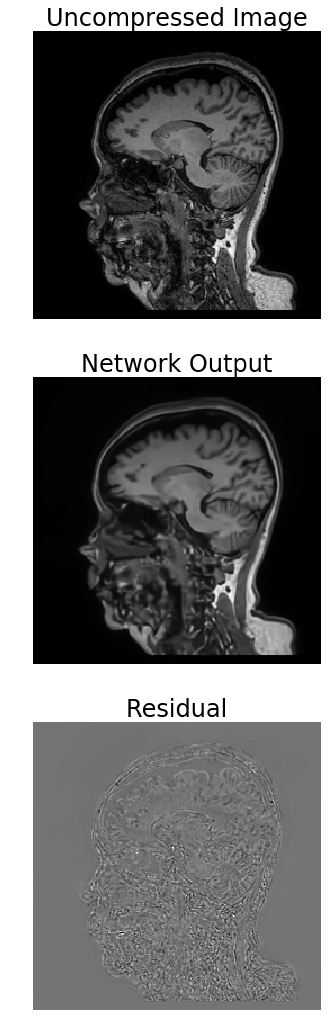

In [28]:
#print(pred)

slc = 63

plt.figure(figsize = (9,18))
plt.subplot(3,1,1)
plt.axis("off")
plt.title("Uncompressed Image", fontsize=24)
plt.imshow(test_unc[slc,:,:,0],cmap = "gray")
plt.subplot(3,1,2)
plt.axis("off")
plt.title("Network Output", fontsize=24)
plt.imshow(pred[slc,:,:,0],cmap = "gray")
plt.subplot(3,1,3)
plt.axis("off")
plt.title("Residual", fontsize=24)
plt.imshow((test_unc[slc,:,:,0] - pred[slc,:,:,0]),cmap = "gray")
plt.show()

Test set results


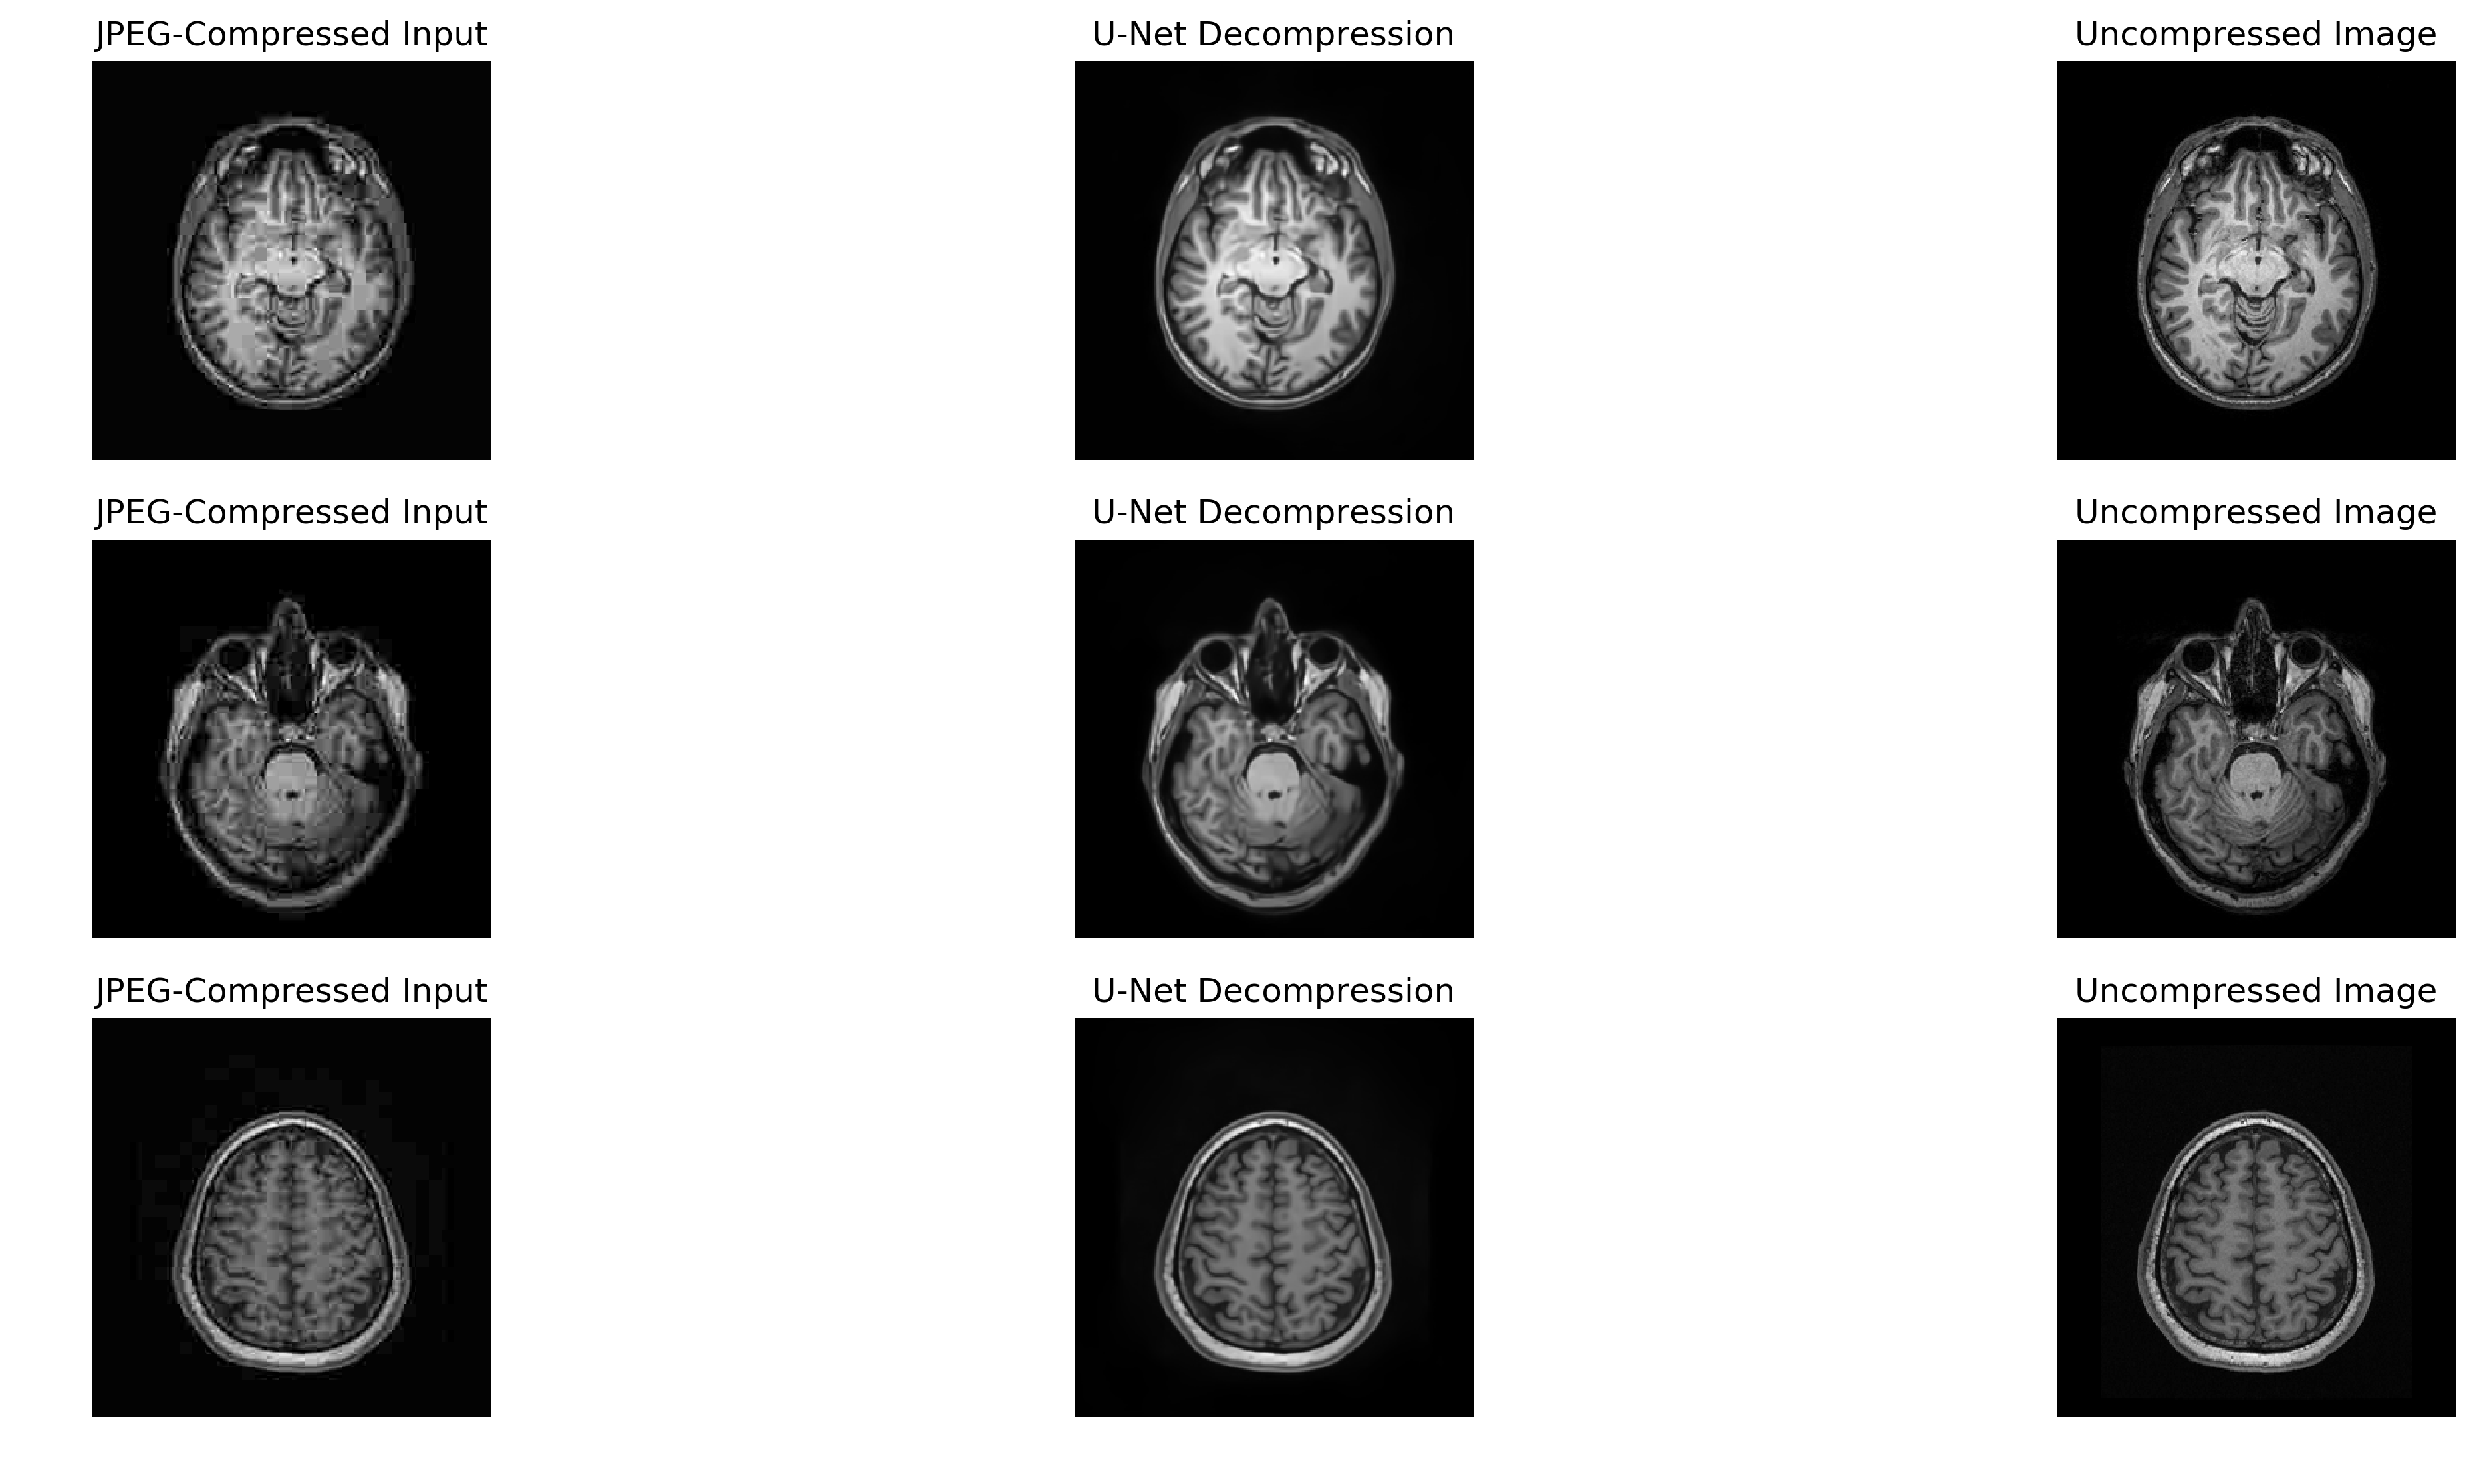

In [14]:
indexes_test = np.arange(len(test_images),dtype = int)
np.random.shuffle(indexes_test)
indexes_test = indexes_test[:3]

print("Test set results")
plt.figure(figsize = (18,9),dpi = 300)
for ii in range(3):
    plt.subplot(3,3,3*ii+1)
    plt.imshow(test_compr[indexes_test[ii],:,:,0],cmap = "gray")
    plt.axis("off")
    plt.title("JPEG-Compressed Input")
    plt.subplot(3,3,3*ii+2)
    plt.imshow(pred[indexes_test[ii],:,:,0],cmap = "gray")
    plt.axis("off")
    plt.title("U-Net Decompression")
    plt.subplot(3,3,3*ii+3)
    plt.imshow(test_unc[indexes_test[ii],:,:,0],cmap = "gray")
    plt.axis("off")
    plt.title("Uncompressed Image")
plt.show()     

In [ ]:
import skimage.measure as metrics

In [ ]:
# SSIM

plt.figure(dpi = 300)
plt.errorbar(range(1,100), ssim[0,:], ssim[1,:],linestyle='None', marker='^')
plt.xlabel("Quality Factor")
plt.ylabel("Mean SSIM (std)")
plt.grid()
plt.show()

In [ ]:
# PSNR
plt.figure(dpi = 300)
plt.errorbar(range(1,100), psnr[1,:], psnr[2,:],linestyle='None', marker='^')
plt.xlabel("Quality Factor")
plt.ylabel("Mean PSNR (std)")
plt.grid()
plt.show()

In [ ]:
# NRMSE
plt.figure(dpi = 300)
plt.errorbar(range(1,100), nrmse[1,:], nrmse[2,:],linestyle='None', marker='^')
plt.xlabel("Quality Factor")
plt.ylabel("Mean NRMSE (std)")
plt.grid()
plt.show()